## Project - ESA Survey

### Introduction

In this analysis I will use survey data from the ESA (European Space Agency) http://open.esa.int/. A survey has been conducted in 2016 with citizens of 22 countries in Europe with regards to space.

I found it interesting in those times where access to space becomes a commercial topic, driven essentially by US companies, to analyse how the europeans see this topic.

The source of the daa is the “ESA Citizens Debate on Space for Europe 2016” 

In [6]:
# Libraries / imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from scipy import stats

%matplotlib inline


In [7]:
# The source of the data can be found on the internet site mentionned above
# As I needed to re-encode the CSV to make it readable in this code, I uploaded the encoded file directly into Jupyter

# Import the data into the df dataframe
df = pd.read_csv('Esa_Seq_Sequence 1_Space_and_me_copy3', sep = ";")
df.head()

,username,firstName,gender,country,signupDate,jobTitle,age,Space-knowledge,1.3.1 Space should be considered as a common good for humanity ?,1.3.2 Space should be considered as an empty and not very relevant place ?,...,"1.4.9 In terms of interest (""this is a very motivating goal""), space programmes should contribute mainly to protect the planet from extra-terrestrial threats (like asteroids) ?","1.5.1 In terms of relevance (ìthis is what we need to do firstî), space programmes should contribute mainly to producing scientific knowledge about the universe ?","1.5.2 In terms of relevance (ìthis is what we need to do firstî), space programmes should contribute mainly to producing scientific knowledge about Earth (e.g. climate change) ?","1.5.3 In terms of relevance (ìthis is what we need to do firstî), space programmes should contribute mainly to anticipating and preventing natural disasters and humanitarian crises ?","1.5.4 In terms of relevance (ìthis is what we need to do firstî), space programmes should contribute mainly to creating new services for everyday life and industry (telecoms, etc.) ?","1.5.5 In terms of relevance (ìthis is what we need to do firstî), space programmes should contribute mainly to increasing the prestige of States and continents ?","1.5.6 In terms of relevance (ìthis is what we need to do firstî), space programmes should contribute mainly to going beyond present technological limits ?","1.5.7 In terms of relevance (ìthis is what we need to do firstî), space programmes should contribute mainly to stepping up international cooperation ?","1.5.8 In terms of relevance (ìthis is what we need to do firstî), space programmes should contribute mainly to exploring new territories beyond Earth ?","1.5.9 In terms of relevance (ìthis is what we need to do firstî), space programmes should contribute mainly to protect the planet from extra-terrestrial threats (like asteroids)?"
0,ESA_ESA_ESA_ESA-DEBATE_636,636,female,dk,2016-09-10 09:48:57,self-employed,44.0,novice,Completely agree,Completely disagree,...,Other,First most relevant,Other,Other,Second most relevant,Third most relevant,Other,Other,Other,Other
1,ESA_ESA_ESA_ESA-DEBATE_608,608,male,dk,2016-09-10 09:48:55,other,51.0,interested,Disagree,Disagree,...,Third most interesting,Other,Other,Other,Other,First most relevant,Other,Other,Second most relevant,Third most interesting
2,ESA_ESA_ESA_ESA-DEBATE_648,648,female,dk,2016-09-10 09:48:55,unemployed,29.0,novice,I don't have a clear opinion,I don't have a clear opinion,...,Third most interesting,Other,First most relevant,Second most relevant,Other,Other,Other,Other,Other,Third most interesting
3,ESA_ESA_ESA_ESA-DEBATE_606,606,male,dk,2016-09-10 09:48:54,manager,35.0,professional,Agree,I don't have a clear opinion,...,Other,Third most relevant,Third most relevant,Second most relevant,Other,Other,Other,Other,First most relevant,Other
4,ESA_ESA_ESA_ESA-DEBATE_644,644,male,dk,2016-09-10 09:48:55,other,36.0,interested,Completely Disagree,Disagree,...,Other,First most relevant,Third most relevant,Third most relevant,Third most relevant,Third most relevant,Second most relevant,First most relevant,First most relevant,Third most interesting


### 1. Exploration and cleaning of the data

In this part, I will first explore the data, its types, possible values. As I stumble accross data to be cleaned I will directly to it. 

In the last section of this notebook, I will write functions that perform all the tasks made "manually" across the exploration and analysis.


In [8]:
# Size of the dataset
df.shape

(1540, 32)

In [9]:
# Types of data
df.dtypes

username                                                                                                                                                                                   object
firstName                                                                                                                                                                                   int64
gender                                                                                                                                                                                     object
country                                                                                                                                                                                    object
signupDate                                                                                                                                                                                 object
jobTitle                      

In [10]:
# How many NaN are in the data set
print("there are {} NaN in the dataset".format(sum(df.isna().sum())))

there are 1 NaN in the dataset


In [11]:
# Where is the NaN
df.isna().sum()['age']

1

In [12]:
## The column 'age" contains a NaN
## I will replace this NaN with the mean of the column, datatype is float so feasible
df_new = df.fillna(df.mean())

In [13]:
## Exploring the characteristics of respondents "gender", "country", "jobTitle", "age", "Space-knowledge"

# Gender
df_new['gender'].value_counts()

male       992
female     511
na          36
<empty>      1
Name: gender, dtype: int64

In [14]:
# As most respondents are men I will replace na and empty with the value male
df_new['gender'].replace('na', 'male', inplace = True)
df_new['gender'].replace('<empty>', 'male', inplace = True)
df_new['gender'].value_counts()

male      1029
female     511
Name: gender, dtype: int64

In [15]:
# I have replaced 37 values out of 1503 with 'male', eg have modified only less than 3% of the data, hence believe this
# is ok so

In [16]:
# Exploration of the country column
df_new['country'].value_counts()

de    117
pt    101
ch     94
fr     94
es     91
gr     88
ee     84
ro     83
hu     79
cz     75
lu     74
ie     63
be     63
no     61
nl     59
it     56
se     56
dk     50
pl     50
at     45
fi     32
gb     25
Name: country, dtype: int64

In [17]:
# Nb of countries represented
df_new['country'].value_counts().shape[0]

22

In [18]:
# JobTitle
df_new['jobTitle'].value_counts()

other white collar    471
student               397
other                 194
self-employed         164
manager               128
retired                72
unemployed             39
manual worker          32
na                     28
house person            6
employee                4
executive               2
job seeker              1
liberal profession      1
retiree                 1
Name: jobTitle, dtype: int64

In [19]:
# There are again "na" values coded in
df_new['jobTitle'].replace('na', 'other white collar', inplace = True)
df_new['jobTitle'].value_counts()


other white collar    499
student               397
other                 194
self-employed         164
manager               128
retired                72
unemployed             39
manual worker          32
house person            6
employee                4
executive               2
job seeker              1
liberal profession      1
retiree                 1
Name: jobTitle, dtype: int64

In [20]:
# As a side note a this moment of the exploration, values that have very few counts will be hard to use for a prediction
# I will at this stage just make a list of those in case I later need to make something with those
jobTitle_few = ['house person', 'employee', 'executive', 'liberal profession', 'retiree', 'job seeker', 'unemployed', 'manual worker', 'retired']

In [21]:
jobTitle_few

['house person',
 'employee',
 'executive',
 'liberal profession',
 'retiree',
 'job seeker',
 'unemployed',
 'manual worker',
 'retired']

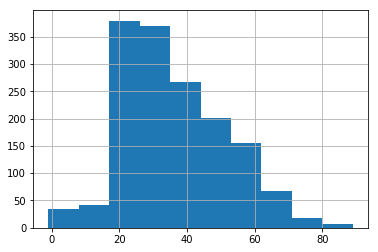

In [22]:
# Histogramm of age of respondents
df_new['age'].hist(bins = 10)

In [23]:
# One can see that the distribution of age is left skewed, mosty "young" people took part in this survey

In [24]:
# Space knowledge
df_new['Space-knowledge'].value_counts()

interested      690
na              370
novice          360
professional    120
Name: Space-knowledge, dtype: int64

In [25]:
# In this case I have too many "na" coded in this variable, ca 25% to simply replace with another value
# On top, the distribution of the othe values is not straightforward as to replace "na" with one of them

### 2. Analysis

In this section, I try to analyse deeper the responses to a single question. In the last section, I will do so for all questions of the survey in the 1st part.

In [26]:
# Extract the columns I need
df_analysis = df_new.iloc[:, 0:11]
df_analysis.head()

,username,firstName,gender,country,signupDate,jobTitle,age,Space-knowledge,1.3.1 Space should be considered as a common good for humanity ?,1.3.2 Space should be considered as an empty and not very relevant place ?,"1.3.3 Space should be considered as a source for commerce, industry and economic development?"
0,ESA_ESA_ESA_ESA-DEBATE_636,636,female,dk,2016-09-10 09:48:57,self-employed,44.0,novice,Completely agree,Completely disagree,Agree
1,ESA_ESA_ESA_ESA-DEBATE_608,608,male,dk,2016-09-10 09:48:55,other,51.0,interested,Disagree,Disagree,Completely disagree
2,ESA_ESA_ESA_ESA-DEBATE_648,648,female,dk,2016-09-10 09:48:55,unemployed,29.0,novice,I don't have a clear opinion,I don't have a clear opinion,Completely agree
3,ESA_ESA_ESA_ESA-DEBATE_606,606,male,dk,2016-09-10 09:48:54,manager,35.0,professional,Agree,I don't have a clear opinion,I don't have a clear opinion
4,ESA_ESA_ESA_ESA-DEBATE_644,644,male,dk,2016-09-10 09:48:55,other,36.0,interested,Completely Disagree,Disagree,Completely disagree


In [27]:
# Remove columns that have no relevant data to this analysis
df_analysis.drop(['username', 'firstName', 'signupDate', '1.3.1 Space should be considered as a common good for humanity ?', '1.3.2 Space should be considered as an empty and not very relevant place ?'], axis = 1, inplace = True)
df_analysis.head()

,gender,country,jobTitle,age,Space-knowledge,"1.3.3 Space should be considered as a source for commerce, industry and economic development?"
0,female,dk,self-employed,44.0,novice,Agree
1,male,dk,other,51.0,interested,Completely disagree
2,female,dk,unemployed,29.0,novice,Completely agree
3,male,dk,manager,35.0,professional,I don't have a clear opinion
4,male,dk,other,36.0,interested,Completely disagree


In [28]:
# In order to analyse the answers, I will code the responses with numbers
# replace column name to make coding easier
df_analysis.rename(columns={'1.3.3 Space should be considered as a source for commerce, industry and economic development?': 'Answer'}, inplace=True)

In [29]:
# Nb of different answers
df_analysis['Answer'].value_counts()

Agree                           710
Completely agree                476
Disagree                        182
Completely disagree              88
I don't have a clear opinion     84
Name: Answer, dtype: int64

In [30]:
# The answers are on a 5 point scale
df_analysis['Answer'].replace({'Completely agree': 5, 'Agree' : 4, "I don't have a clear opinion" :3, 'Disagree' : 2, 'Completely Disagree' :1, 'Completely disagree' :1 }, inplace = True)

In [31]:
df_analysis.head()

,gender,country,jobTitle,age,Space-knowledge,Answer
0,female,dk,self-employed,44.0,novice,4
1,male,dk,other,51.0,interested,1
2,female,dk,unemployed,29.0,novice,5
3,male,dk,manager,35.0,professional,3
4,male,dk,other,36.0,interested,1


In [32]:
df_analysis['Answer'].mean()

3.846753246753247

In [33]:
# Explore variances across characteristics of respondents
df_analysis.groupby('gender').mean()[['Answer']]

,Answer
gender,
female,3.598826
male,3.969874


In [34]:
df_analysis.groupby('country').mean()[['Answer']].sort_values(by = 'Answer')

,Answer
country,
de,2.871795
ch,2.978723
at,3.311111
se,3.517857
it,3.625000
dk,3.740000
fr,3.797872
pt,3.811881
nl,3.915254


In [35]:
# One can see already quite a difference among countries

In [36]:
df_analysis.groupby('jobTitle').mean()[['Answer']].sort_values(by = 'Answer')

,Answer
jobTitle,
liberal profession,2.000000
house person,2.666667
job seeker,3.000000
manual worker,3.500000
employee,3.750000
student,3.763224
unemployed,3.820513
other white collar,3.833667
self-employed,3.865854


In [37]:
df_analysis.groupby('Space-knowledge').mean()[['Answer']].sort_values(by = 'Answer')

,Answer
Space-knowledge,
na,3.672973
novice,3.761111
interested,3.953623
professional,4.025000


In [38]:
# As expected people interested in the space topics are more positive than others
df_analysis.head()

,gender,country,jobTitle,age,Space-knowledge,Answer
0,female,dk,self-employed,44.0,novice,4
1,male,dk,other,51.0,interested,1
2,female,dk,unemployed,29.0,novice,5
3,male,dk,manager,35.0,professional,3
4,male,dk,other,36.0,interested,1


In [39]:
df2 = df_analysis[df_analysis.jobTitle.isin(jobTitle_few) == False]

In [40]:
df2.shape

(1382, 6)

In [41]:
df2.head()

,gender,country,jobTitle,age,Space-knowledge,Answer
0,female,dk,self-employed,44.0,novice,4
1,male,dk,other,51.0,interested,1
3,male,dk,manager,35.0,professional,3
4,male,dk,other,36.0,interested,1
5,male,dk,student,28.0,novice,5


### 3. Model building

I will in this analysis only build a simple model, a linear regression model, to see if the answers to the question can be modelled according to the type of respondents. 

In [43]:
# Hot encode categorial variables
df3 = pd.get_dummies(df2, drop_first = True)

In [44]:
df3.head()

,age,Answer,gender_male,country_be,country_ch,country_cz,country_de,country_dk,country_ee,country_es,...,country_pt,country_ro,country_se,jobTitle_other,jobTitle_other white collar,jobTitle_self-employed,jobTitle_student,Space-knowledge_na,Space-knowledge_novice,Space-knowledge_professional
0,44.0,4,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,51.0,1,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,35.0,3,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,36.0,1,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5,28.0,5,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [45]:
df3.shape

(1382, 31)

In [47]:
## Extract X (predicting variables) and y (outcome)
y = df3['Answer']
X = df3.drop(['Answer'], axis = 1)

In [49]:
X.head()

,age,gender_male,country_be,country_ch,country_cz,country_de,country_dk,country_ee,country_es,country_fi,...,country_pt,country_ro,country_se,jobTitle_other,jobTitle_other white collar,jobTitle_self-employed,jobTitle_student,Space-knowledge_na,Space-knowledge_novice,Space-knowledge_professional
0,44.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,51.0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,35.0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,36.0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,28.0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [50]:
# Using scikit learn, split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [52]:
# Instantiate the model
lm = LinearRegression(normalize = True)

In [53]:
# Fit the model
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [54]:
# Predict on testing set
y_preds = lm.predict(X_test)

In [55]:
# How good is the prediction
print("r2 score on testing data is {}".format(r2_score(y_test, y_preds)))

r2 score on testing data is 0.1771609339094964


In [56]:
lm.coef_

array([-0.00644701,  0.26386537,  0.78178996, -0.23806495,  0.91121938,
       -0.16200084,  0.52060178,  1.15451073,  0.93955124,  0.65996049,
        0.47001874,  0.51899953,  0.99913664,  1.28773026,  0.7589293 ,
        0.51526711,  0.89695994,  0.74088519,  0.78861301,  0.9421418 ,
        0.51706048,  0.70298515,  0.4129822 , -0.13846568, -0.1329597 ,
       -0.01835374, -0.3419849 , -0.19474714, -0.15172053,  0.00715577])

In [57]:
df_coeff = pd.DataFrame(lm.coef_)
df_coeff

,0
0,-0.006447
1,0.263865
2,0.781790
3,-0.238065
4,0.911219
5,-0.162001
6,0.520602
7,1.154511
8,0.939551
9,0.659960


In [58]:
X.columns


Index(['age', 'gender_male', 'country_be', 'country_ch', 'country_cz',
       'country_de', 'country_dk', 'country_ee', 'country_es', 'country_fi',
       'country_fr', 'country_gb', 'country_gr', 'country_hu', 'country_ie',
       'country_it', 'country_lu', 'country_nl', 'country_no', 'country_pl',
       'country_pt', 'country_ro', 'country_se', 'jobTitle_other',
       'jobTitle_other white collar', 'jobTitle_self-employed',
       'jobTitle_student', 'Space-knowledge_na', 'Space-knowledge_novice',
       'Space-knowledge_professional'],
      dtype='object')

In [59]:
coeff = pd.concat([pd.DataFrame(X.columns), df_coeff], axis = 1)
coeff

,0,0
0,age,-0.006447
1,gender_male,0.263865
2,country_be,0.781790
3,country_ch,-0.238065
4,country_cz,0.911219
5,country_de,-0.162001
6,country_dk,0.520602
7,country_ee,1.154511
8,country_es,0.939551
9,country_fi,0.659960


In [61]:
question = ['1.3.3 Space should be considered as a source for commerce, industry and economic development?']
explore_answer = df.loc[:, df.columns.isin(question)]
explore_answer.columns = ['col1']
# explore_answer.head()
explore_answer['col1'].value_counts()

Agree                           710
Completely agree                476
Disagree                        182
Completely disagree              88
I don't have a clear opinion     84
Name: col1, dtype: int64

In [62]:
df11 = df.replace({'Completely agree': 5, 'Agree' : 4, "I don't have a clear opinion" :3, 'Disagree' : 2, 'Completely Disagree' :1 , 'Completely disagree' :1})


In [63]:
df11.describe()

,firstName,age,1.3.1 Space should be considered as a common good for humanity ?,1.3.2 Space should be considered as an empty and not very relevant place ?,"1.3.3 Space should be considered as a source for commerce, industry and economic development?",1.3.4 Space should be considered as a source for scientific developments and research?,1.3.5 Space should be considered as a universe of possibilities and opportunities ?,1.3.6 Space should be considered as a place that should be protected from polluting and potentially harmful human activities ?
count,1540.000000,1539.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000
mean,2341.711039,35.594542,4.516883,1.480519,3.846753,4.824675,4.672078,4.190909
std,1270.875100,15.357317,0.878803,0.951185,1.152401,0.488106,0.629262,1.052202
min,7.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1410.750000,24.000000,4.000000,1.000000,4.000000,5.000000,4.000000,4.000000
50%,2281.500000,33.000000,5.000000,1.000000,4.000000,5.000000,5.000000,4.000000
75%,3509.000000,46.000000,5.000000,2.000000,5.000000,5.000000,5.000000,5.000000
max,4425.000000,89.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [64]:
df11.head()


,username,firstName,gender,country,signupDate,jobTitle,age,Space-knowledge,1.3.1 Space should be considered as a common good for humanity ?,1.3.2 Space should be considered as an empty and not very relevant place ?,...,"1.4.9 In terms of interest (""this is a very motivating goal""), space programmes should contribute mainly to protect the planet from extra-terrestrial threats (like asteroids) ?","1.5.1 In terms of relevance (ìthis is what we need to do firstî), space programmes should contribute mainly to producing scientific knowledge about the universe ?","1.5.2 In terms of relevance (ìthis is what we need to do firstî), space programmes should contribute mainly to producing scientific knowledge about Earth (e.g. climate change) ?","1.5.3 In terms of relevance (ìthis is what we need to do firstî), space programmes should contribute mainly to anticipating and preventing natural disasters and humanitarian crises ?","1.5.4 In terms of relevance (ìthis is what we need to do firstî), space programmes should contribute mainly to creating new services for everyday life and industry (telecoms, etc.) ?","1.5.5 In terms of relevance (ìthis is what we need to do firstî), space programmes should contribute mainly to increasing the prestige of States and continents ?","1.5.6 In terms of relevance (ìthis is what we need to do firstî), space programmes should contribute mainly to going beyond present technological limits ?","1.5.7 In terms of relevance (ìthis is what we need to do firstî), space programmes should contribute mainly to stepping up international cooperation ?","1.5.8 In terms of relevance (ìthis is what we need to do firstî), space programmes should contribute mainly to exploring new territories beyond Earth ?","1.5.9 In terms of relevance (ìthis is what we need to do firstî), space programmes should contribute mainly to protect the planet from extra-terrestrial threats (like asteroids)?"
0,ESA_ESA_ESA_ESA-DEBATE_636,636,female,dk,2016-09-10 09:48:57,self-employed,44.0,novice,5,1,...,Other,First most relevant,Other,Other,Second most relevant,Third most relevant,Other,Other,Other,Other
1,ESA_ESA_ESA_ESA-DEBATE_608,608,male,dk,2016-09-10 09:48:55,other,51.0,interested,2,2,...,Third most interesting,Other,Other,Other,Other,First most relevant,Other,Other,Second most relevant,Third most interesting
2,ESA_ESA_ESA_ESA-DEBATE_648,648,female,dk,2016-09-10 09:48:55,unemployed,29.0,novice,3,3,...,Third most interesting,Other,First most relevant,Second most relevant,Other,Other,Other,Other,Other,Third most interesting
3,ESA_ESA_ESA_ESA-DEBATE_606,606,male,dk,2016-09-10 09:48:54,manager,35.0,professional,4,3,...,Other,Third most relevant,Third most relevant,Second most relevant,Other,Other,Other,Other,First most relevant,Other
4,ESA_ESA_ESA_ESA-DEBATE_644,644,male,dk,2016-09-10 09:48:55,other,36.0,interested,1,2,...,Other,First most relevant,Third most relevant,Third most relevant,Third most relevant,Third most relevant,Second most relevant,First most relevant,First most relevant,Third most interesting


### 4. Recap and extension

In this section I will create functions to:
- clean up the data according to the steps made above
- fit and predict a linear regression model
- run through the 6 questions of the 1.3.x part of the survey

In [65]:
# Function to clean the data
def clean_df(df):
    
    # Fill nas with mean of the column (in our case only the age)
    df = df.fillna(df.mean())
    
    # Clean column gender
    df['gender'].replace('na', 'male', inplace = True)
    df['gender'].replace('<empty>', 'male', inplace = True)
    
    # Clean data using info in column jobTitle (few categories with too few data points)
    jobTitle_few = ['house person', 'employee', 'executive', 'liberal profession', 'retiree', 'job seeker', 'unemployed', 'manual worker', 'retired']
    df = df[df.jobTitle.isin(jobTitle_few) == False]
    
    # Slice columns usefull for analysis
    df = df.iloc[:,0:14]
    df.drop(['username', 'firstName', 'signupDate'], axis = 1, inplace = True)
    
    # Code answers into numerical values
    df = df.replace({'Completely agree': 5, 'Agree' : 4, "I don't have a clear opinion" :3, 'Disagree' : 2, 'Completely Disagree' :1 , 'Completely disagree' :1})
    
    return df
    

In [91]:
# Function to run the regression analysis across the questions
def run_analysis(df_clean, col_y):
    
    # extract X and y
    X = df_clean.iloc[:,0:5]
    y = df_clean.iloc[:,col_y]
    
    # Hot encode X
    X = pd.get_dummies(X, drop_first = True)
        
    # Split test set into Training and Testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    
    # Instantiate model
    lm = LinearRegression(normalize = True)
    
    # Fit model
    lm.fit(X_train, y_train)
    
    # Predict
    y_preds = lm.predict(X_test)
    
    # Score model
    r2 = r2_score(y_test, y_preds)
    
    # extract coefficients and create dataframe of coefficients
    params = pd.DataFrame(np.append(lm.intercept_,lm.coef_))
    var = pd.DataFrame(np.append('Intercept', X.columns))
    params = pd.concat([var, params], axis = 1)
    params.columns = ['Param', df_clean.columns[col_y]]
    
    return r2, params


In [128]:
# clean the data using the function
df_clean = clean_df(df)

df_clean.describe()

,age,1.3.1 Space should be considered as a common good for humanity ?,1.3.2 Space should be considered as an empty and not very relevant place ?,"1.3.3 Space should be considered as a source for commerce, industry and economic development?",1.3.4 Space should be considered as a source for scientific developments and research?,1.3.5 Space should be considered as a universe of possibilities and opportunities ?,1.3.6 Space should be considered as a place that should be protected from polluting and potentially harmful human activities ?
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,33.904916,4.513025,1.476122,3.858900,4.832127,4.682344,4.186686
std,14.006904,0.878278,0.954699,1.154121,0.477634,0.621571,1.052508
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,24.000000,4.000000,1.000000,4.000000,5.000000,4.000000,4.000000
50%,32.000000,5.000000,1.000000,4.000000,5.000000,5.000000,4.000000
75%,44.000000,5.000000,2.000000,5.000000,5.000000,5.000000,5.000000
max,83.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [105]:
# Run functions to explore the responses to the 1.3.x questions

# Start to loop through the 6 questions
r2s = []
params_total = pd.DataFrame()

for i in range(5,11):
    
    print("Question {}".format(df_clean.columns[i]))
    
    # run function
    r2_new, params_new = run_analysis(df_clean, i)
    
    # Append results
    r2s.append(r2_new)
   
    if i == 5:
        params_total = params_new
        
    else:
        params_total = params_total.join(params_new.set_index('Param'), on = 'Param')
        
    # display results
    print("R2 score is {0:.3f}".format(r2_new))


(1382, 11)
Question 1.3.1 Space should be considered as a common good for humanity ?
R2 score is 0.038
Question 1.3.2 Space should be considered as an empty and not very relevant place ?
R2 score is 0.257
Question 1.3.3 Space should be considered as a source for commerce, industry and economic development?
R2 score is 0.180
Question 1.3.4 Space should be considered as a source for scientific developments and research?
R2 score is -0.011
Question 1.3.5 Space should be considered as a universe of possibilities and opportunities ?
R2 score is 0.006
Question 1.3.6 Space should be considered as a place that should be protected from polluting and potentially harmful human activities ?
R2 score is 0.041


,Param,1.3.1 Space should be considered as a common good for humanity ?,1.3.2 Space should be considered as an empty and not very relevant place ?,"1.3.3 Space should be considered as a source for commerce, industry and economic development?",1.3.4 Space should be considered as a source for scientific developments and research?,1.3.5 Space should be considered as a universe of possibilities and opportunities ?,1.3.6 Space should be considered as a place that should be protected from polluting and potentially harmful human activities ?
0,Intercept,4.299626,0.767129,3.547624,4.970116,5.171799,4.304785
1,age,0.000765,0.002800,-0.007243,-0.002980,-0.005950,-0.001491
2,gender_male,0.029717,0.093799,0.268187,0.015617,-0.025072,-0.286878
3,country_be,0.260744,0.924478,0.785110,-0.001578,-0.146991,0.407110
4,country_ch,0.139918,0.244655,-0.240902,0.051399,-0.175339,-0.039014


#### Visualization of the regression coefficients (e.g. without the intercept)

To do that I need to remove the row related to the intercept and then create a heatmap of the other coefficients

In [117]:
# Remove first row related to intercepts
coe = params_total.iloc[1:]
coe = coe.set_index('Param')

In [118]:
coe

,1.3.1 Space should be considered as a common good for humanity ?,1.3.2 Space should be considered as an empty and not very relevant place ?,"1.3.3 Space should be considered as a source for commerce, industry and economic development?",1.3.4 Space should be considered as a source for scientific developments and research?,1.3.5 Space should be considered as a universe of possibilities and opportunities ?,1.3.6 Space should be considered as a place that should be protected from polluting and potentially harmful human activities ?
Param,,,,,,
age,0.000765,0.002800,-0.007243,-0.002980,-0.005950,-0.001491
gender_male,0.029717,0.093799,0.268187,0.015617,-0.025072,-0.286878
country_be,0.260744,0.924478,0.785110,-0.001578,-0.146991,0.407110
country_ch,0.139918,0.244655,-0.240902,0.051399,-0.175339,-0.039014
country_cz,-0.001145,0.234376,0.909025,0.075807,-0.435040,0.041618
country_de,0.150406,0.153845,-0.192068,0.004776,-0.158119,-0.274692
country_dk,0.071713,0.415302,0.519467,-0.051618,-0.260656,0.210970
country_ee,0.132219,0.194929,1.137353,-0.027565,-0.228091,-0.085062
country_es,0.241113,0.025900,0.941300,0.102051,-0.029692,0.743689


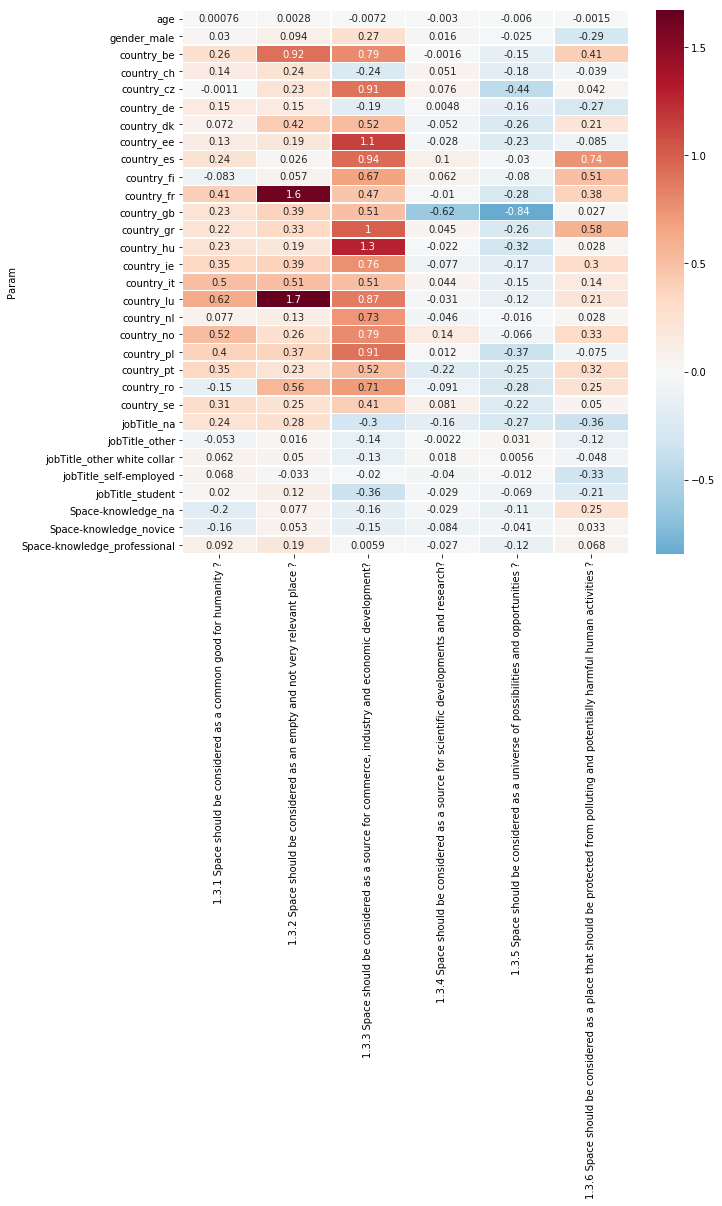

In [127]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(coe, annot=True, ax = ax, center = 0, linewidths=.5, cmap = "RdBu_r")

### Conclusions

From the simple descriptive statistics, one can see that the average answer to the 6 questions differ quite a bit. Most of the questions are very positively answered (average above 4.5 on a 1 to 5 scale):
- 1.3.1 Space should be considered as a common good for humanity ?
- 1.3.4 Space should be considered as a source for scientific developments and research?
- 1.3.4 Space should be considered as a source for scientific developments and research?

2 questions have an average answer around 4 (equivalent to agree):
- 1.3.6 Space should be considered as a place that should be protected from polluting and potentially harmful human activities ?
- 1.3.3 Space should be considered as a source for commerce, industry and economic development?

On one question is the average answer on the "disagree" side (avg of 1.8 on a 1 to 5 scale):
- 1.3.2 Space should be considered as an empty and not very relevant place ?


#### Modelling / Predictions

On questions 1, 4, 5 and 6 the predictability of the answers using a linear regression model is (quasi) non-existant. It tends to indicate that the characteristics of the respondents cannot be used to predict their answers, aka these are "random". One can also quasi see it on the heat map where most of the regression coefficients (in particular for questions 4 and 5) are around 0, e.g they don't help predict the answers.

For questions 2 and 3 the r2 score of our simple linear regression model is not very high but around 0.2 for both. Through the color coding one can see that the country origin has most of the time the biggest coefficients, which tends to demonstrate that the position on those questions is mainly a national view (the default country - the one dropped in the hot encoding, is AT, Austria). Age does not seem to make a big difference, whereas being a male or a female seems to be relevant for the answers to those questions. Men to tend to think more than women that space should be considered as an empty and not very relevant place and that space should be considered as a source for commerce, industry and economic development.

All in all the respondents of this survey tend to agree that Space should be considered a commong good, a place to develop research and explore its possibilities. The answer to the economic question is more spread (also a higher standard deviation). On this one, the country of the origin of respondents seem to be the explanatory variable of the respondent's view. Interestingly respondents coming from german-speeking countries (Austria, Germany and Switzerland) are the ones who more opposed the view that Space should be considered as a source for Commerce.

Disclaimer: the significance of those coefficients was not analysed here, so that a statistically significant analysis and explanations cannot be made.